In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Submission Neural Language Processing
#Muhammad Iodine Hanifan Firdaus

%cd /content/drive/MyDrive/Dicoding_Machine_Learning_2/Submission1

import pandas as pd
df = pd.read_csv('Emotion_final.csv')
df = df[['Text', 'Emotion']]
df['Text'] = df['Text'].str.replace('/','')
df['Text'] = df['Text'].str.replace('â€™','')
df['Text'] = df['Text'].str.replace('nn','')
df['Text'] = df['Text'].str.replace('    ','')
df['Text'] = df['Text'].str.replace('\'','')
df['Text'] = df['Text'].str.replace('(','')
df['Text'] = df['Text'].str.replace(')','')
df['Text'] = df['Text'].str.replace(':','')
df['Text'] = df['Text'].str.replace('\r',' ')
df['Text'] = df['Text'].str.replace('\\','')
df['Text'] = df['Text'].str.replace('Ã','')
df['Text'] = df['Text'].str.replace('*','')
df['Text'] = df['Text'].str.replace('©','')
df['Text'] = df['Text'].str.replace('Â','')
df.head()

/content/drive/MyDrive/Dicoding_Machine_Learning_2/Submission1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future versi

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [3]:
category = pd.get_dummies(df.Emotion)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Emotion')
df_baru

,Text,anger,fear,happy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,0,1,0,0,0,0
21455,Successive state elections have seen the gover...,0,1,0,0,0,0
21456,Vincent was irritated but not dismay,0,1,0,0,0,0
21457,Kendall-Hume turned back to face the dismayed ...,0,1,0,0,0,0


In [4]:
len(df_baru)

21459

In [5]:
df_baru['Text'][100]

'i wont let me child cry it out because i feel that loving her and lily when she was little was going to be opportunities that only lasted for those short few months'

In [6]:
tweet = df_baru['Text'].values
label = df_baru[['anger', 'fear', 'happy', 'love', 'sadness', 'surprise']].values

In [7]:
from sklearn.model_selection import train_test_split
tweet_train, tweet_test, label_train, label_test = train_test_split(tweet, label, test_size=0.2, random_state=32)

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

tokenizer = Tokenizer(num_words=1000, oov_token='x', lower=False)
tokenizer.fit_on_texts(tweet_train)
tokenizer.fit_on_texts(tweet_test)

sequence_train = tokenizer.texts_to_sequences(tweet_train)
sequence_test = tokenizer.texts_to_sequences(tweet_test)

padded_train = pad_sequences(sequence_train)
padded_test = pad_sequences(sequence_test)

In [13]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1000, output_dim=16),
    tf.keras.layers.LSTM(512, return_sequences=True),
    tf.keras.layers.LSTM(512),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 16)          16000     
                                                                 
 lstm_5 (LSTM)               (None, None, 512)         1083392   
                                                                 
 lstm_6 (LSTM)               (None, 512)               2099200   
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 1024)              525312    
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_11 (Dense)            (None, 1024)             

In [10]:
class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print('Akurasi Tercapai')
      self.model.stop_training = True
callback = myCallbacks()

In [15]:
history = model.fit(
    padded_train, 
    label_train, 
    epochs=50, 
    validation_data=(padded_test, label_test), 
    verbose=2,
    batch_size=256,
    callbacks=[callback]
    )

Epoch 1/50
68/68 - 8s - loss: 1.6013 - accuracy: 0.3236 - val_loss: 1.5412 - val_accuracy: 0.3260 - 8s/epoch - 114ms/step
Epoch 2/50
68/68 - 7s - loss: 1.3511 - accuracy: 0.3785 - val_loss: 1.2731 - val_accuracy: 0.3959 - 7s/epoch - 103ms/step
Epoch 3/50
68/68 - 7s - loss: 1.1714 - accuracy: 0.4492 - val_loss: 1.1110 - val_accuracy: 0.5193 - 7s/epoch - 104ms/step
Epoch 4/50
68/68 - 7s - loss: 1.0296 - accuracy: 0.5765 - val_loss: 1.0631 - val_accuracy: 0.6018 - 7s/epoch - 107ms/step
Epoch 5/50
68/68 - 7s - loss: 0.9069 - accuracy: 0.6455 - val_loss: 0.8861 - val_accuracy: 0.6493 - 7s/epoch - 108ms/step
Epoch 6/50
68/68 - 7s - loss: 0.8235 - accuracy: 0.6879 - val_loss: 0.7723 - val_accuracy: 0.7411 - 7s/epoch - 108ms/step
Epoch 7/50
68/68 - 7s - loss: 0.7294 - accuracy: 0.7466 - val_loss: 0.6653 - val_accuracy: 0.7780 - 7s/epoch - 109ms/step
Epoch 8/50
68/68 - 8s - loss: 0.6186 - accuracy: 0.7896 - val_loss: 0.7495 - val_accuracy: 0.7407 - 8s/epoch - 111ms/step
Epoch 9/50
68/68 - 8s - 

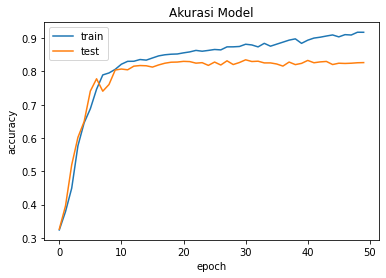

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

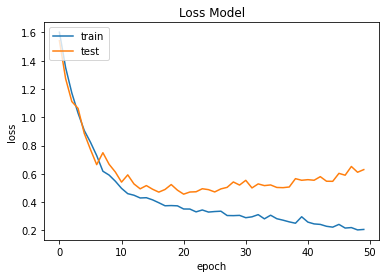

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()